## Philipp Panzenböck

#### The following codes show data query, data processing and data visualization with different visualization methods.

#### Importing modules

In [1]:
#Importing the relevant modules
import requests
import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib as mpl

import seaborn as sns
import matplotlib.pyplot as plt

import squarify

from IPython.display import display, Image

#### Data query from SDWs

Title: Loans vis-a-vis euro area insurance corporations & pension funds reported by MFI in the euro area (stock)    
Key: BSI.M.U2.Y.U.A20.A.1.U2.2220.Z01.E

* Frequency: M (Monthly)
* Reference area: U2 (Euro area)
* Adjustment indicator: Y (Workingday and seasonal adjusted)
* Balance sheet item: A20 (Loans)
* Original maturity: A (Total)
* Data type: 1 (Outstanding amount at the end of the period (stocks))
* Counterpart area: U2 (Euro area)
* Currency of transaction: Z01 (All currencies combined)
* Balance sheet suffic: E (Euro)

Link: https://sdw.ecb.europa.eu/browse.do?org.apache.struts.taglib.html.TOKEN=e3a4f40376d77e3d663e01a57c5e25bc&df=true&ec=&dc=&oc=&pb=&rc=&DATASET=0&removeItem=&removedItemList=&mergeFilter=&activeTab=BSI&showHide=&BS_ITEM.14=A20&MATURITY_ORIG.14=A&DATA_TYPE.14=1&MAX_DOWNLOAD_SERIES=500&SERIES_MAX_NUM=50&node=bbn3490&legendRef=reference&legendPub=published&ajaxTab=true

_Source: https://www.pythonsherpa.com/static/files/html/ECB%20-%20Open%20Data.html (customized)_

In [2]:
# Building blocks for the URL
entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/'
resource = 'data'
flowRef ='BSI'
key = 'M.U2.Y.U.A20.A.1.U2.2220.Z01.E'

parameters = {
    'startPeriod': '2018-01-31',
    'endPeriod':   '2022-06-30'
}

In [3]:
# Construct the URL: https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A
request_url = entrypoint + resource + '/'+ flowRef + '/' + key
# Make the HTTP request
response = requests.get(request_url, params=parameters)
# Make the HTTP request again, now requesting for CSV format
response = requests.get(request_url, params=parameters, headers={'Accept': 'text/csv'})
# Read the response as a file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))

In [4]:
df.head(3)

,KEY,FREQ,REF_AREA,ADJUSTMENT,BS_REP_SECTOR,BS_ITEM,MATURITY_ORIG,DATA_TYPE,COUNT_AREA,BS_COUNT_SECTOR,...,PUBL_PUBLIC,UNIT_INDEX_BASE,COMPILATION,DECIMALS,NAT_TITLE,SOURCE_AGENCY,TITLE,TITLE_COMPL,UNIT,UNIT_MULT
0,BSI.M.U2.Y.U.A20.A.1.U2.2220.Z01.E,M,U2,Y,U,A20,A,1,U2,2220,...,NaN,NaN,NaN,0,NaN,NaN,Loans vis-a-vis euro area insurance corporatio...,"Euro area (changing composition), Outstanding ...",EUR,6
1,BSI.M.U2.Y.U.A20.A.1.U2.2220.Z01.E,M,U2,Y,U,A20,A,1,U2,2220,...,NaN,NaN,NaN,0,NaN,NaN,Loans vis-a-vis euro area insurance corporatio...,"Euro area (changing composition), Outstanding ...",EUR,6
2,BSI.M.U2.Y.U.A20.A.1.U2.2220.Z01.E,M,U2,Y,U,A20,A,1,U2,2220,...,NaN,NaN,NaN,0,NaN,NaN,Loans vis-a-vis euro area insurance corporatio...,"Euro area (changing composition), Outstanding ...",EUR,6


In [5]:
# Create a new DataFrame
df = df.filter(['TIME_PERIOD', 'OBS_VALUE'], axis=1)
df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'])
df = df.set_index('TIME_PERIOD')
df.tail()

,OBS_VALUE
TIME_PERIOD,
2022-01-01,172752
2022-02-01,170151
2022-03-01,153048
2022-04-01,160776
2022-05-01,160180


#### Defining parameters for the following charts

In [6]:
height = 6
wide = 14
lineplot_color = 'black'
titel_fontsize = 18
title_distance = 10
labels_fontsize = 16
legend_fontsize = 13
save_dpi = 300

### Lineplot

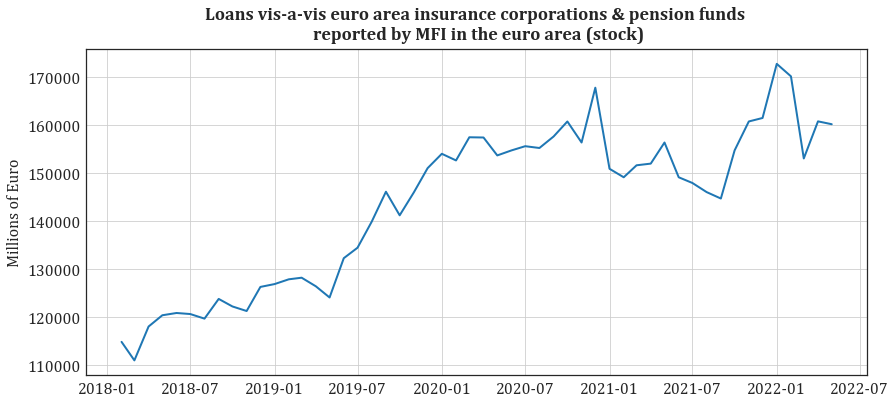

In [7]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc("font", family="Cambria")

plt.figure(figsize=(wide, height))
plt.plot(df, linewidth=2)
plt.ylabel(ylabel = "Millions of Euro", size=labels_fontsize)
plt.xticks(fontsize=labels_fontsize)
plt.yticks(fontsize=labels_fontsize)
plt.title("Loans vis-a-vis euro area insurance corporations & pension funds \n reported by MFI in the euro area (stock)", fontweight="bold", size=titel_fontsize, pad=title_distance)
plt.grid(all)
plt.savefig(f'Chart_1.png', dpi=save_dpi, bbox_inches='tight')

#### Color scheme definition

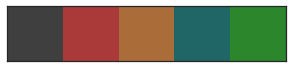

In [8]:
def get_colors2():
    return np.array([
        [0.25, 0.25, 0.25],        # very dark gray
        [0.667, 0.224, 0.224],     # red A13646
        [0.667, 0.424, 0.224],     # brown AA6439
        [0.131, 0.400, 0.400],     # blue 256E5D
        [0.176, 0.533, 0.176]      # green 4B9130
    ]) 
sns.palplot(get_colors2())

### Query of further data from the SDW

In [9]:
# Building blocks for the URL
entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/'
resource = 'data'
flowRef ='BSI'
# Loans vis-a-vis euro area NFC reported by MFI in the euro area (stock)
keys = ['M.U2.Y.U.A20.F.1.U2.2240.Z01.E',  # Up to 1 year
        'M.U2.Y.U.A20.I.1.U2.2240.Z01.E',  # Over 1 and up to 5 years
        'M.U2.Y.U.A20.J.1.U2.2240.Z01.E'   # Over 5 years
       ]

parameters = {
    'startPeriod': '2018-01-31',
    'endPeriod':   '2022-06-30'
}

In [10]:
i = 0
maturiy = ["F","I","J"]
for key in keys:
    print(f'{key} stored in df_BSI_{maturiy[i]}')
    # Construct the URL: https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A
    request_url = entrypoint + resource + '/'+ flowRef + '/' + key
    # Make the HTTP request
    response = requests.get(request_url, params=parameters)
    # Make the HTTP request again, now requesting for CSV format
    response = requests.get(request_url, params=parameters, headers={'Accept': 'text/csv'})
    # Read the response as a file into a Pandas DataFrame
    df = pd.read_csv(io.StringIO(response.text))
    
    df = df.filter(['TIME_PERIOD', 'OBS_VALUE'], axis=1)
    df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'])
    df = df.set_index('TIME_PERIOD')
    
    # storing in dynamic dataframes
    exec(f'df_BSI_{maturiy[i]}= df.copy()')
    i = i + 1

M.U2.Y.U.A20.F.1.U2.2240.Z01.E stored in df_BSI_F
M.U2.Y.U.A20.I.1.U2.2240.Z01.E stored in df_BSI_I
M.U2.Y.U.A20.J.1.U2.2240.Z01.E stored in df_BSI_J


In [11]:
df_BSI_F = df_BSI_F.rename(columns={"OBS_VALUE": "Up to 1 year (F)"})
df_BSI_I = df_BSI_I.rename(columns={"OBS_VALUE": "Over 1 and up to 5 years (I)"})
df_BSI_J = df_BSI_J.rename(columns={"OBS_VALUE": "Over 5 years (J)"})

In [12]:
df_BSI_merged = pd.merge(df_BSI_F, df_BSI_I, left_index=True, right_index=True)
df_BSI_merged = pd.merge(df_BSI_merged, df_BSI_J, left_index=True, right_index=True)

In [13]:
df_BSI_merged.head(3)

,Up to 1 year (F),Over 1 and up to 5 years (I),Over 5 years (J)
TIME_PERIOD,,,
2018-02-01,991796,823704,2534634
2018-03-01,999959,822194,2524270
2018-04-01,1001986,823826,2531302


### Lineplot (multiple lines)

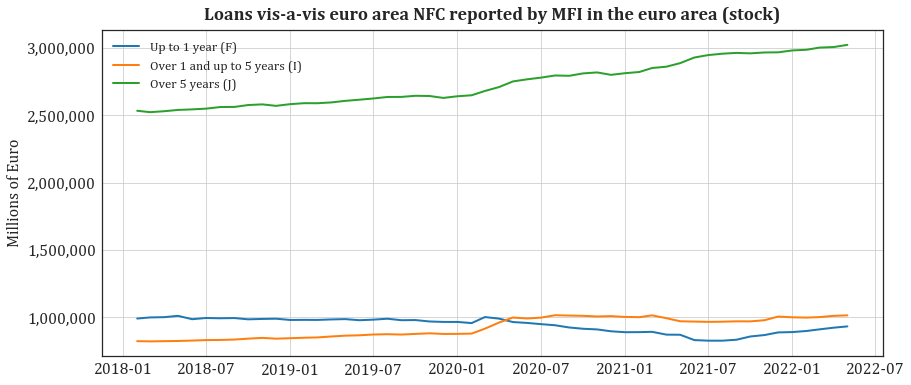

In [14]:
plt.style.use(['seaborn-white'])
plt.rc("font", family="Cambria")

fig, ax = plt.subplots(figsize = (wide,height))
ax.plot(df_BSI_merged, linewidth=2)
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.legend(list(df_BSI_merged.columns), fontsize=legend_fontsize)
ax.set_ylabel("Millions of Euro", fontsize=labels_fontsize)
ax.tick_params(labelsize=labels_fontsize)
ax.set_title("Loans vis-a-vis euro area NFC reported by MFI in the euro area (stock)", fontweight="bold", size=titel_fontsize, pad=title_distance)
ax.grid(all)
fig.savefig(f'Chart_2.png', dpi=save_dpi, bbox_inches='tight')

### Boxplot

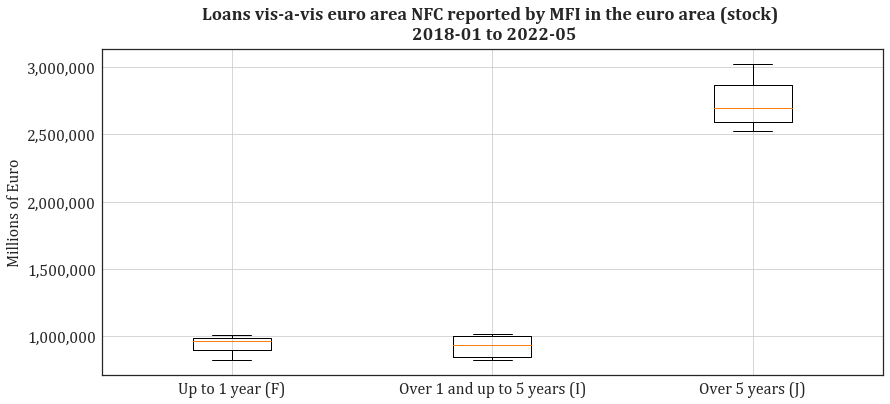

In [15]:
plt.style.use(['seaborn-white'])
plt.rc("font", family="Cambria")

fig, ax = plt.subplots(figsize = (wide,height))
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.boxplot(df_BSI_merged.reset_index().drop("TIME_PERIOD", axis=1).T)
ax.set_ylabel("Millions of Euro", fontsize=labels_fontsize)
ax.tick_params(labelsize=labels_fontsize)
ax.set_xticklabels(list(df_BSI_merged.columns))
ax.set_title("Loans vis-a-vis euro area NFC reported by MFI in the euro area (stock) \n 2018-01 to 2022-05", fontweight="bold", size=titel_fontsize, pad=title_distance)
ax.grid(all)
fig.savefig(f'Chart_3.png', dpi=save_dpi, bbox_inches='tight')

### Barplot (multiple bars)

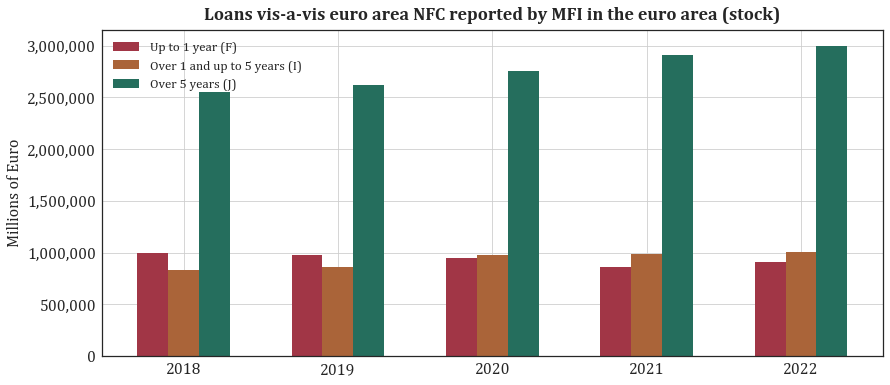

In [16]:
plt.style.use(['seaborn-white'])
plt.rc("font", family="Cambria")

fig, ax = plt.subplots(figsize = (wide,height))
ax.bar(df_BSI_merged.resample('Y').mean().index.year-0.2, df_BSI_merged.resample('Y').mean()[df_BSI_merged.columns[0]], width = 0.2, color='#A13646')
ax.bar(df_BSI_merged.resample('Y').mean().index.year, df_BSI_merged.resample('Y').mean()[df_BSI_merged.columns[1]], width = 0.2, color='#AA6439')
ax.bar(df_BSI_merged.resample('Y').mean().index.year+0.2, df_BSI_merged.resample('Y').mean()[df_BSI_merged.columns[2]], width = 0.2, color='#256E5D')
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.legend(list(df_BSI_merged.resample('Y').sum().columns), fontsize=legend_fontsize)
ax.set_ylabel("Millions of Euro", fontsize=labels_fontsize)
ax.tick_params(labelsize=labels_fontsize)
ax.set_title("Loans vis-a-vis euro area NFC reported by MFI in the euro area (stock)", fontweight="bold", size=titel_fontsize, pad=title_distance)
ax.grid(all)
fig.savefig(f'Chart_4.png', dpi=save_dpi, bbox_inches='tight')

### Stacked area chart

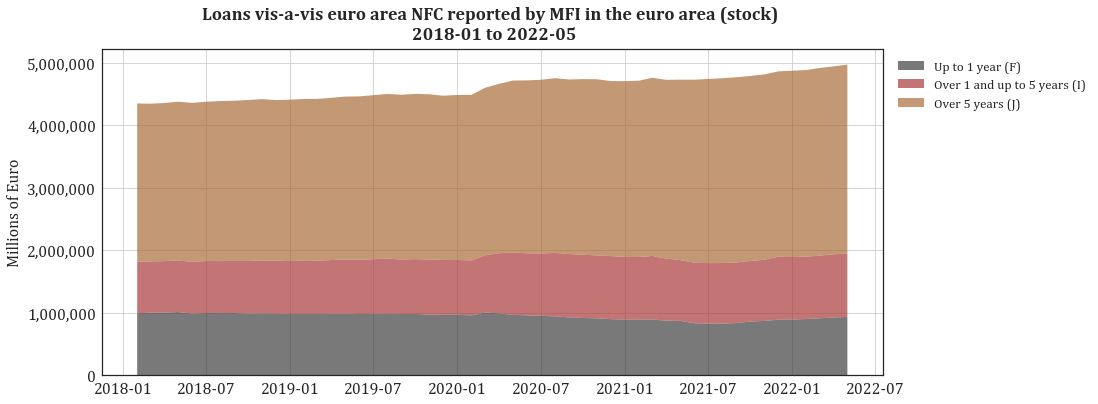

In [17]:
plt.style.use(['seaborn-white'])
plt.rc("font", family="Cambria")

fig, ax = plt.subplots(figsize = (wide,height))
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.stackplot(df_BSI_merged.index,
                  df_BSI_merged[df_BSI_merged.columns[0]],
                  df_BSI_merged[df_BSI_merged.columns[1]],
                  df_BSI_merged[df_BSI_merged.columns[2]],              
                  labels=list(df_BSI_merged.columns), colors=get_colors2(), alpha=0.7)
ax.legend(list(df_BSI_merged.columns), fontsize=legend_fontsize, bbox_to_anchor=(1.275, 1.00))
ax.set_ylabel("Millions of Euro", fontsize=labels_fontsize)
ax.tick_params(labelsize=labels_fontsize)
ax.set_title("Loans vis-a-vis euro area NFC reported by MFI in the euro area (stock) \n 2018-01 to 2022-05", fontweight="bold", size=titel_fontsize, pad=title_distance)
ax.grid(all)
fig.savefig(f'Chart_5.png', dpi=save_dpi, bbox_inches='tight')

### Treemap

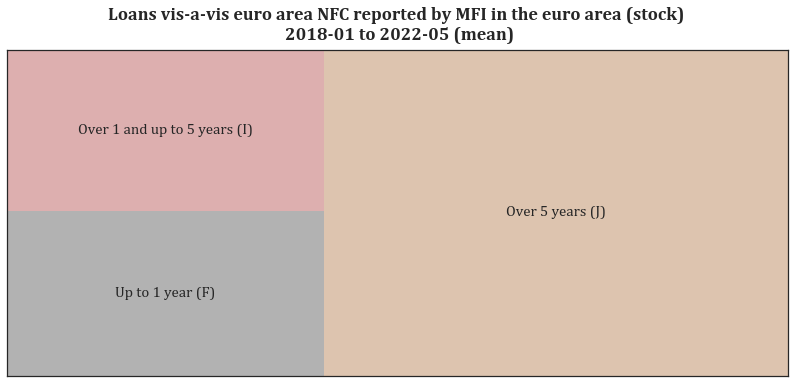

In [18]:
plt.style.use(['seaborn-white'])
plt.rc("font", family="Cambria")

fig, ax = plt.subplots(figsize = (wide,height))
squarify.plot(label=list(df_BSI_merged.columns), sizes=df_BSI_merged.mean(), color = get_colors2(), alpha=.4, text_kwargs={'fontsize':15})
ax.set_title("Loans vis-a-vis euro area NFC reported by MFI in the euro area (stock) \n 2018-01 to 2022-05 (mean)", fontweight="bold", size=titel_fontsize, pad=title_distance)
ax.set_yticklabels([])
ax.set_xticklabels([])
fig.savefig(f'Chart_6.png', dpi=save_dpi, bbox_inches='tight')